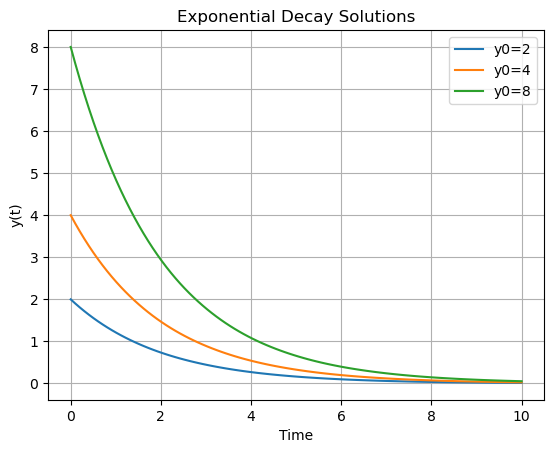

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def exponential_decay(t, y): 
    return -0.5 * y

t = np.linspace(0, 10, 100)

sol = solve_ivp(exponential_decay, t_span=(0, 10), y0=[2, 4, 8], t_eval=t)
plt
plt.plot(sol.t, sol.y[0], label='y0=2')
plt.plot(sol.t, sol.y[1], label='y0=4')
plt.plot(sol.t, sol.y[2], label='y0=8')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Exponential Decay Solutions')
plt.legend()
plt.grid()
plt.show()

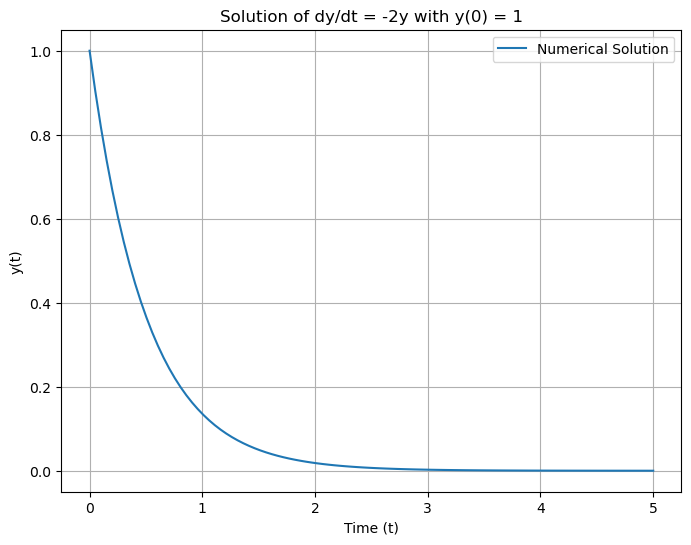

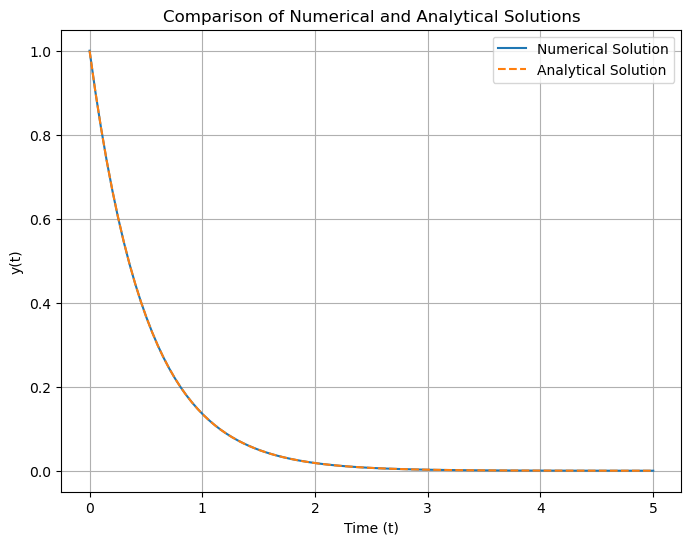

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 1. Define the ODE function
# The function takes t (time) and y (the dependent variable) as input
# and returns the value of dy/dt.
def ode_function(t, y):
    return -2 * y

# 2. Define the time span and initial condition
t_span = (0, 5)  # Integrate from t=0 to t=5
y0 = [1]         # Initial condition: y(0) = 1 (must be a list/array)

# 3. Solve the IVP using solve_ivp
# The t_eval argument can be used to specify the times at which to store the solution.
t_eval = np.linspace(t_span[0], t_span[1], 100) # Evaluate at 100 points
solution = solve_ivp(ode_function, t_span, y0, t_eval=t_eval)

# 4. Access and plot the results
time_points = solution.t
y_values = solution.y[0] # Access the first (and only) dependent variable

plt.figure(figsize=(8, 6))
plt.plot(time_points, y_values, label='Numerical Solution')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Solution of dy/dt = -2y with y(0) = 1')
plt.grid(True)
plt.legend()
plt.show()

# You can also compare with the analytical solution for this simple case:
# Analytical solution is y(t) = e^(-2t)
analytical_y = np.exp(-2 * time_points)
plt.figure(figsize=(8, 6))
plt.plot(time_points, y_values, label='Numerical Solution')
plt.plot(time_points, analytical_y, '--', label='Analytical Solution')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Comparison of Numerical and Analytical Solutions')
plt.grid(True)
plt.legend()
plt.show()

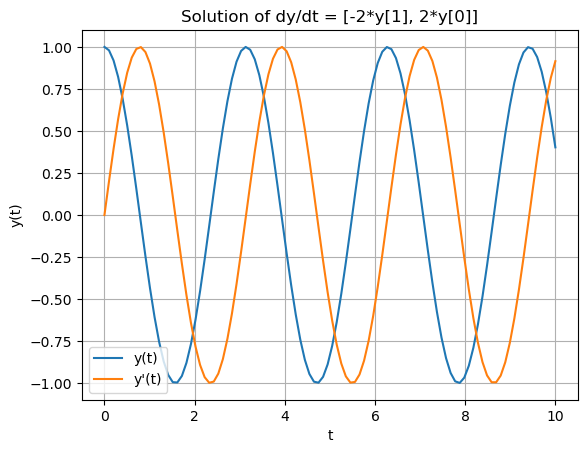

In [5]:
# Define the system of ODEs: dy/dt = f(t, y)
def system(t, y):
  return [-2 * y[1], 2 * y[0]]

# Define the time span and initial conditions
t_span = [0, 10]
y0 = [1, 0]

# Solve the ODEs
sol = solve_ivp(system, t_span, y0, dense_output=True)

# sol is an object containing the solution
# sol.t contains the time points where the solution is computed
# sol.y contains the corresponding values of the solution (y)

# You can evaluate the solution at specific time points
t = np.linspace(0, 10, 100)
sol_at_t = sol.sol(t)

# Plot the solution
plt.plot(t, sol_at_t[0], label='y(t)')
plt.plot(t, sol_at_t[1], label='y\'(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.title('Solution of dy/dt = [-2*y[1], 2*y[0]]')
plt.grid(True)
plt.show()

Find the solution of $$\frac{dy(t)}{dt} + \frac{y(t)}{4} = x(t) $$
given $$ x(t) = cos(3t) \\ y(0) = -1 $$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [18]:
def x(t):
    return np.cos(3 * t)

def f(t, y):
    dydt = x(t) - y / 4 
    return dydt

tspan = np.linspace(0, 25, 1000)
yinit = [-1]

sol = solve_ivp(f,(0, 25), yinit, t_eval=tspan, rtol=1e-5)

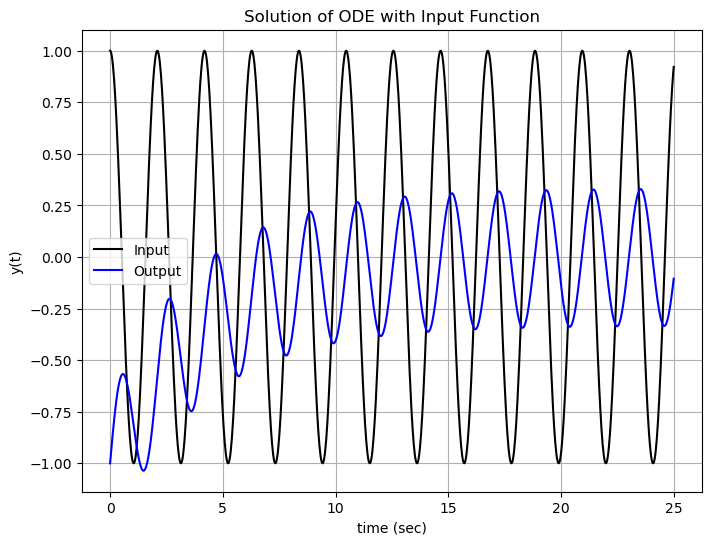

In [24]:
plt.figure(figsize=(8, 6))

plt.plot(sol.t, x(sol.t), 'k-', label='Input')
plt.plot(sol.t, sol.y[0], 'b-', label='Output')
plt.legend(loc='best')
plt.xlabel('time (sec)')
plt.ylabel('y(t)')
plt.title('Solution of ODE with Input Function')
plt.grid(True)
plt.show()

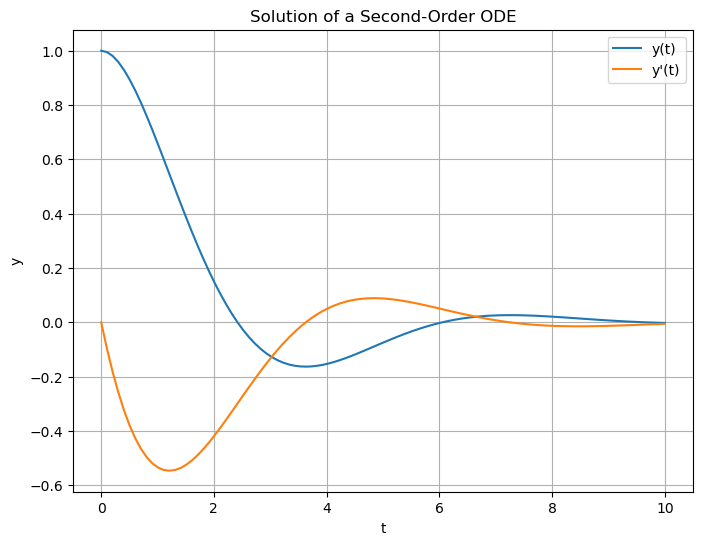

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Assume f(t, y1, y2) is defined elsewhere for your specific problem
# For example, let's solve d^2y/dt^2 + dy/dt + y = 0, y(0)=1, dy/dt(0)=0
# This means f(x, y1, y2) = -y2 - y1

def f(t, y1, y2):
    return -y2 - y1

def system_of_odes(t, Y):
    y1, y2 = Y
    dydt = [
        y2,
        f(t, y1, y2)
    ]
    return dydt

t_span = [0, 10] # Solve from x=0 to x=10
initial_conditions = [1, 0] # y(0)=1, dy/dt(0)=0 (which is y2(0)=0)

# Solve the IVP
solution = solve_ivp(system_of_odes, t_span, initial_conditions, dense_output=True)

# Evaluate the solution at specific points for plotting
t_eval = np.linspace(t_span[0], t_span[1], 100)
y_solution = solution.sol(t_eval) # This returns [y1_values, y2_values]

# Plotting the solution for y (which is y1)
plt.figure(figsize=(8, 6))
plt.plot(t_eval, y_solution[0], label='y(t)')
plt.plot(t_eval, y_solution[1], label="y'(t)") # Plotting dy/dt as well
plt.xlabel('t (sec)')
plt.ylabel('y')
plt.title('Solution of a Second-Order ODE')
plt.legend()
plt.grid(True)
plt.show()
